In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [181]:
train_data1 = [[2, 3, 1], [2, 5, 1], [3, 9, 1], [3, 5, 1], [4, 6, 1]]
train_data2 = [[2, 1, -1], [4, 1, -1], [6, 3, -1], [7, 4, -1], [5, 1, -1]]
train_datas = train_data1 + train_data2
label= [train_datas[i][2] for i in range(len(train_datas))]
x=np.array(train_datas)[:,0:2]

In [182]:
def sign(v):
    if v >= 0:
        return 1
    else:
        return -1

# 原始形式求解

In [264]:
[label[i] * (w.T.dot(x[i])+b) for i in range(len(x))]

In [255]:
w = np.zeros((2))
b = 0
eta = 1
epoch = 1000

isAllTrue = True
isFirst = True

while (isFirst or not isAllTrue):
    isFirst = False
    isAllTrue=True
    for i in range(len(x)):
        if label[i] * (w.T.dot(x[i])+b) <= 0:
            w = w + eta * label[i] * x[i]
            b = b + eta * label[i]
            isAllTrue=False


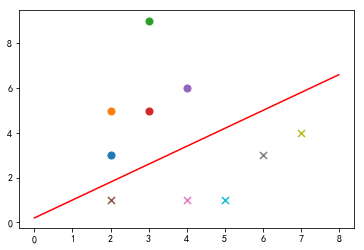

In [263]:
plt.figure()
for i in range(len(x)):
    if label[i]==1:plt.scatter(x[i,0], x[i,1], s=50)
    else:plt.scatter(x[i,0],x[i,1], marker='x', s=50)

x1 = np.linspace(0, 8, 100)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2, color='r', label='y1 data')

plt.show()

In [265]:
# check result 
[label[i] * (w.T.dot(x[i])+b) for i in range(len(x))]  # all classifer correctlly

[6.0, 16.0, 32.0, 12.0, 13.0, 4.0, 12.0, 10.0, 9.0, 16.0]

# 对偶形式求解

In [243]:

def perceptron_duiou(train_num, train_datas, lr):
    w = 0.0
    b = 0
    datas_len = len(train_datas)
    alpha = [0 for i in range(datas_len)]
    train_array = np.array(train_datas)
    gram = np.matmul(train_array[:, 0:-1], train_array[:, 0:-1].T)
    for idx in range(train_num):
        tmp = 0
        i = np.random.randint(0, datas_len - 1)
        yi = train_array[i, -1]
        for j in range(datas_len):
            tmp += alpha[j] * train_array[j, -1] * gram[i, j]
        tmp += b
        if (yi * tmp <= 0):
            alpha[i] = alpha[i] + lr
            b += lr * yi
    for i in range(datas_len):
        w += alpha[i] * train_array[i, 0:-1] * train_array[i, -1]
    return w, b, alpha, gram

In [244]:
def plot(train_datas, w, b):
    plt.figure('perceptron')
    x1 = np.linspace(0, 8, 100)
    x2 = (-w[0] * x1 - b) / w[1]
    plt.plot(x1, x2, color='r', label='y1 data')
    datas_len = len(train_datas)
    for i in range(datas_len):
        if (train_datas[i][2] == 1):
            plt.scatter(train_datas[i][0], train_datas[i][1], s=50)
        else:
            plt.scatter(train_datas[i][0], train_datas[i][1], marker='x', s=50)
    plt.show()


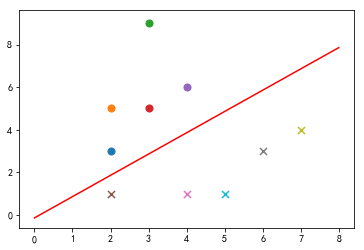

In [245]:
train_data1 = [[2, 3, 1], [2, 5, 1], [3, 9, 1], [3, 5, 1], [4, 6, 1]]
train_data2 = [[2, 1, -1], [4, 1, -1], [6, 3, -1], [7, 4, -1], [5, 1, -1]]
train_datas = train_data1 + train_data2
w, b, alpha, gram = perceptron_duiou(train_num=300, train_datas=train_datas, lr=0.1)
plot(train_datas, w, b)